In [7]:
def f(x):    
  return (x+2)*2    
print(f.apply([1,2,3,4]))

AttributeError: 'function' object has no attribute 'apply'

In [1]:
import os
import pandas as pd
df = pd.read_csv("data/Realestate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [3]:
df.shape

(414, 8)

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from ipywidgets import interact

In [5]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [6]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [7]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

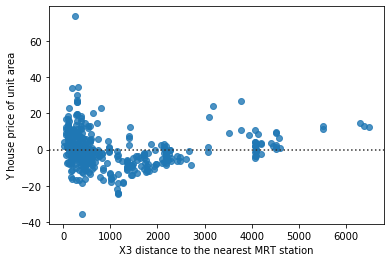

In [8]:
import seaborn as sns
sns.residplot('X3 distance to the nearest MRT station', 'Y house price of unit area', data = df)

In [9]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = model.predict(x_train)
y_pred

array([44.24231298, -0.90420232, 30.14808844, 40.07192232, 34.17956737,
       43.79944588, 34.98996762, 45.61153078, 44.78486423, 47.84042378,
       47.5042008 , 38.26971569, 32.14741697, 46.01486592, 36.89780944,
       45.34448261, 41.86561354, 42.97852455, 46.77520246, 39.52556869,
       38.5073405 , 32.88157685, 36.64784781, 38.51081516, 39.63645104,
       41.88931357, 36.71693868, 38.58378609, 32.10876596, 38.53789518,
       44.5944382 , 43.60182808, 19.35561478, 37.76781633, 13.67009864,
       47.35781115, 13.82082804, 49.10470093, 41.42183553, 15.87392359,
       36.94676495, 36.77874187, 38.38220902, 45.59202258, 31.49458305,
       47.11415933, 34.44810535, 35.65434734, 28.05183322, 39.47926164,
       49.15159292, 48.83663363, 49.92662836, 36.64039038, 47.08462327,
       21.69324372, 37.53939453, 38.53467988, 43.83070028, 26.54848985,
       45.35959636, 34.17607894, 16.35609448, 44.20718424, 43.75921536,
       41.28293662, 35.28790179, 29.83709271, 42.7413096 , 45.94

In [19]:
y_pred = model.predict(x_test)
y_pred

array([33.32816822, 13.10772633, 43.26509595, 14.2351448 , 14.63427051,
       34.75188016, 48.96874175, 40.65636258, 37.25686331, 27.95513687,
       43.36568338, 43.02246033, 45.19577812, 41.54853771, 37.77857548,
       44.11885541, 23.92271854, 44.19394238, 46.26030316, 46.03396289,
       44.25474709, 40.87790661, 48.7771996 , 39.63572789, 39.06295919,
       45.88755697, 37.03351564,  5.59886482, 43.90729319, 37.9239612 ,
       44.23765944, 38.51447121, 35.74697046, 44.44425227, 41.30223538,
       35.41647697, 42.39886085, 40.67605564, 20.07702579, 36.3051007 ,
       45.36696903, 39.80682719, 50.12090773, 40.8080376 , 35.64297489,
       49.85837915, 44.72624661, 40.36391258, 39.96597926, 28.09751731,
       40.09452383, 44.0540324 , 33.58498923, 41.13851666, 40.95823062,
       37.07052525, 40.98520963, 39.28599794, 39.30880012, 46.95571667,
       42.76890891, 43.86327656, 45.46597116, 17.9995915 , 11.23870742,
       35.84044946, 37.47899132, 43.16046135, 42.97796602, 42.17